In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn2, venn3_circles
from upsetplot import UpSet, from_contents

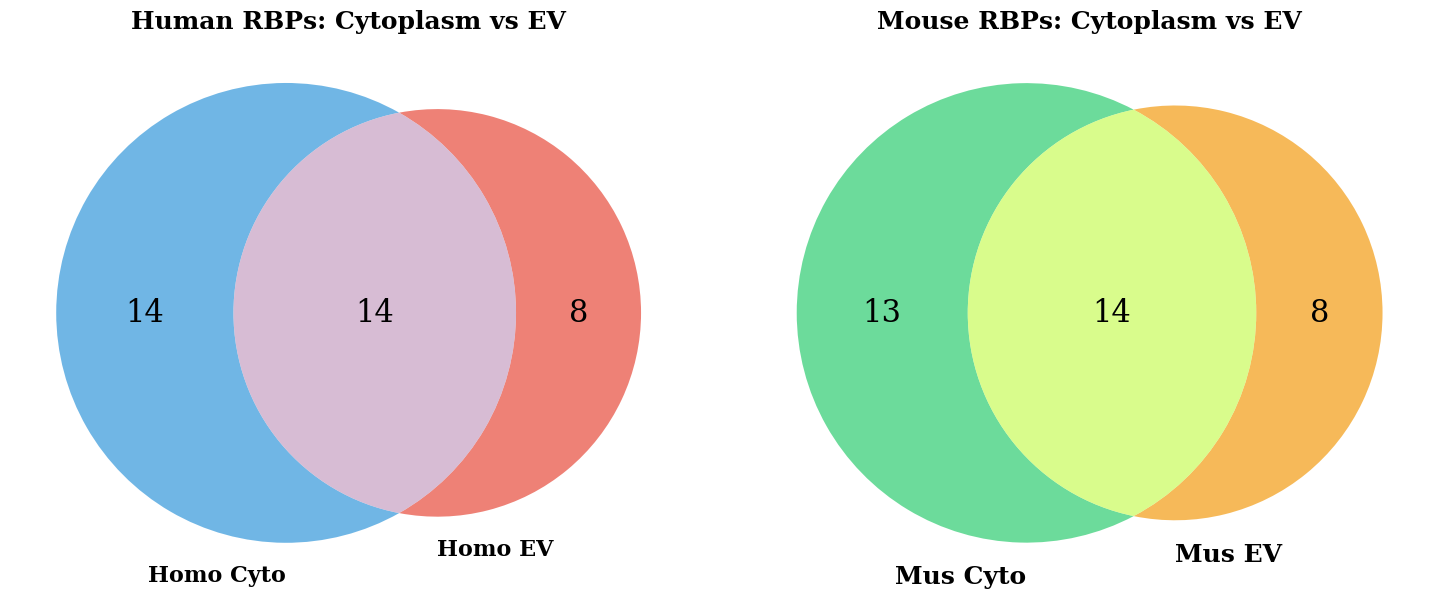

In [8]:
# 定义列名
columns = ["RBP_name", "Query_ID", "Target_ID", "Optimal_offset", "p-value", "E-value", "q-value", "Overlap", "Query_consensus", "Target_consensus", "Orientation"]

# 读取四个文件并进行筛选
def read_and_filter(file_path):
    df = pd.read_csv(file_path, sep="\t", header=None, names=columns)
    # 筛选p-value、E-value、q-value三列全部小于0.05的行
    filtered_df = df[(df["p-value"] < 0.05) & (df["E-value"] < 0.05) & (df["q-value"] < 0.05)]
    # 只保留RBP_name列并转为set
    return set(filtered_df["RBP_name"])

cyto_homo = read_and_filter("/lulabdata3/huangkeyun/zhangys/RNA_locator/motif_analysis/Motif_Comparison_Output/homo_final/homo_cyto_favour_motif_final.tsv")
ev_homo = read_and_filter("/lulabdata3/huangkeyun/zhangys/RNA_locator/motif_analysis/Motif_Comparison_Output/homo_final/homo_EV_favour_motif_final.tsv")
cyto_mus = read_and_filter("/lulabdata3/huangkeyun/zhangys/RNA_locator/motif_analysis/Motif_Comparison_Output/mus_final/mus_cyto_favour_motif_final.tsv")
ev_mus = read_and_filter("/lulabdata3/huangkeyun/zhangys/RNA_locator/motif_analysis/Motif_Comparison_Output/mus_final/mus_EV_favour_motif_final.tsv")

# 设置字体和颜色参数
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'serif',
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'legend.fontsize': 12
})

# 方法1: 画两个独立的韦恩图比较人类和小鼠
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 人类的韦恩图 (cyto_homo vs ev_homo)
plt.subplot(1, 2, 1)
v1 = venn2([cyto_homo, ev_homo], 
      set_labels=('Homo Cyto', 'Homo EV'),
      set_colors=('#3498db', '#e74c3c'),  # 蓝色和红色
      alpha=0.7)
# 调整标签字体大小
number_font = 22
if v1.get_label_by_id('10'):
    v1.get_label_by_id('10').set_fontsize(number_font)
if v1.get_label_by_id('01'):
    v1.get_label_by_id('01').set_fontsize(number_font)
if v1.get_label_by_id('11'):
    v1.get_label_by_id('11').set_fontsize(number_font)
# 调整集合标签字体大小
for text in v1.set_labels:
    if text:
        text.set_fontsize(16)
        text.set_fontweight('bold')
plt.title('Human RBPs: Cytoplasm vs EV', fontsize=18, fontweight='bold', color='black')

# 小鼠的韦恩图 (cyto_mus vs ev_mus)
plt.subplot(1, 2, 2)
v2 = venn2([cyto_mus, ev_mus], 
      set_labels=('Mus Cyto', 'Mus EV'),
      set_colors=('#2ecc71', '#f39c12'),  # 绿色和橙色
      alpha=0.7)
# 调整标签字体大小
if v2.get_label_by_id('10'):
    v2.get_label_by_id('10').set_fontsize(number_font)
if v2.get_label_by_id('01'):
    v2.get_label_by_id('01').set_fontsize(number_font)
if v2.get_label_by_id('11'):
    v2.get_label_by_id('11').set_fontsize(number_font)
# 调整集合标签字体大小
for text in v2.set_labels:
    if text:
        text.set_fontsize(18)
        text.set_fontweight('bold')
plt.title('Mouse RBPs: Cytoplasm vs EV', fontsize=18, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

In [4]:
# 找出重复的RBP（同时在ev_homo和cyto_homo中出现的）
overlap_homo = ev_homo.intersection(cyto_homo)

# 找出ev_homo独有的RBP
ev_homo_unique = ev_homo - cyto_homo

# 找出cyto_homo独有的RBP
cyto_homo_unique = cyto_homo - ev_homo

print(f"重复的RBP数量: {len(overlap_homo)}")
print("\n重复的RBP列表:")
print(sorted(list(overlap_homo)))

print(f"\nEV独有的RBP数量: {len(ev_homo_unique)}")
print("\nEV独有的RBP列表:")
print(sorted(list(ev_homo_unique)))

print(f"\nCyto独有的RBP数量: {len(cyto_homo_unique)}")
print("\nCyto独有的RBP列表:")
print(sorted(list(cyto_homo_unique)))

重复的RBP数量: 14

重复的RBP列表:
['(HNRNPR)_(Gallus_gallus)_(RBD_0.97)', '(PCBP3)_(Mus_musculus)_(RBD_1.00)', 'CPEB4', 'HNRNPCL1', 'MBNL1', 'PCBP1', 'PCBP2', 'PTBP1', 'RALY', 'ROD1', 'TIA1', 'U2AF2', 'YB-1', 'ZC3H10']

EV独有的RBP数量: 8

EV独有的RBP列表:
['(RBM38)_(Mus_musculus)_(RBD_0.99)', 'A2BP1', 'CSDA', 'ELAVL2', 'HNRNPC', 'SNRPA', 'TARDBP', 'hnRNPK']

Cyto独有的RBP数量: 14

Cyto独有的RBP列表:
['(RBM45)_(Mus_musculus)_(RBD_0.94)', 'CPEB2', 'FMR1', 'HNRNPL', 'LIN28A', 'NOVA2', 'PABPN1', 'PPRC1', 'RBM3', 'RBM8A', 'SAMD4A', 'SRSF7', 'STAR-PAP', 'hnRNPLL']


In [5]:
# 找出重复的RBP（同时在ev_mus和cyto_mus中出现的）
overlap_mus = ev_mus.intersection(cyto_mus)

# 找出ev_mus独有的RBP
ev_mus_unique = ev_mus - cyto_mus

# 找出cyto_mus独有的RBP
cyto_mus_unique = cyto_mus - ev_mus

print(f"重复的RBP数量: {len(overlap_mus)}")
print("\n重复的RBP列表:")
print(sorted(list(overlap_mus)))

print(f"\nEV独有的RBP数量: {len(ev_mus_unique)}")
print("\nEV独有的RBP列表:")
print(sorted(list(ev_mus_unique)))

print(f"\nCyto独有的RBP数量: {len(cyto_mus_unique)}")
print("\nCyto独有的RBP列表:")
print(sorted(list(cyto_mus_unique)))

重复的RBP数量: 14

重复的RBP列表:
['(Cpeb4)_(Homo_sapiens)_(RBD_1.00)', '(Csda)_(Homo_sapiens)_(RBD_1.00)', '(Hnrnpk)_(Homo_sapiens)_(RBD_1.00)', '(Hnrnpr)_(Gallus_gallus)_(RBD_0.97)', '(Mbnl1)_(Homo_sapiens)_(RBD_1.00)', '(Pcbp2)_(Homo_sapiens)_(RBD_1.00)', '(Ptbp1)_(Homo_sapiens)_(RBD_0.96)', '(Raly)_(Homo_sapiens)_(RBD_0.97)', '(Rod1)_(Homo_sapiens)_(RBD_0.80)', '(Tia1)_(Homo_sapiens)_(RBD_1.00)', '(Tial1)_(Homo_sapiens)_(RBD_0.89)', '(U2af2)_(Homo_sapiens)_(RBD_1.00)', 'Pcbp1', 'Pcbp3']

EV独有的RBP数量: 8

EV独有的RBP列表:
['(Elavl2)_(Homo_sapiens)_(RBD_1.00)', '(Hnrnpc)_(Homo_sapiens)_(RBD_1.00)', '(Rbfox1)_(Homo_sapiens)_(RBD_1.00)', '(Snrpa)_(Homo_sapiens)_(RBD_0.98)', '(Tardbp)_(Homo_sapiens)_(RBD_0.92)', '(Ybx1)_(Homo_sapiens)_(RBD_1.00)', '(Zc3h10)_(Homo_sapiens)_(RBD_1.00)', 'Rbm38']

Cyto独有的RBP数量: 13

Cyto独有的RBP列表:
['(Cpeb2)_(Homo_sapiens)_(RBD_1.00)', '(Fmr1)_(Homo_sapiens)_(RBD_0.97)', '(Hnrpll)_(Homo_sapiens)_(RBD_0.99)', '(Lin28a)_(Homo_sapiens)_(RBD_0.99)', '(Lin28b)_(Homo_sapiens)_(RBD_